<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](../data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](../data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](../data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

* [`formatted-sports-facility-bookings.csv`](../data/formatted-sports-facility-bookings.csv): Quarterly number of bookings and attendances of sports facilties from 2016 to 2023; sourced from [Usage of Sports Facilities Managed by Sport Singapore](https://tablebuilder.singstat.gov.sg/table/TS/M890231) via SingStat

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

As part of the nation's push to more physical active, determine whether rainfall affects the usage of ActiveSG/SportsSG sports facilities, identify correlating patterns, and suggest how to improve usage of sports facilities to maintain physical activities.

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

Studies and interviews in Singapore suggest that rainy weather may deter exercise. Studies outside Singapore have found negative associations between rainy weather and physical activity.

Sources from ActiveSG on their facilities and details:
- https://members.myactivesg.com/facilities/
- https://www.activesgcircle.gov.sg/faq/

SportSG Facilities data from SingStat:
- https://tablebuilder.singstat.gov.sg/table/TS/M890231

Other information:
- https://ehjournal.biomedcentral.com/articles/10.1186/1476-069X-11-12
- https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-022-13431-2

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [110]:
# Code:
number_list = [1,4,6,9]

def avg_list(number_list):
    sum = 0
    for num in number_list:
        sum += num
    return sum/len(number_list)

avg_list(number_list)

5.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [111]:
# Code:

def standard_deviation(number_list):
    sum_diff_squares = 0
    avg = avg_list(number_list)
    for num in number_list:
        sum_diff_squares += (num -avg) ** 2
    
    return (sum_diff_squares / len(number_list)) ** 0.5

standard_deviation(number_list)

2.9154759474226504

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [112]:
# Imports:

# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn.
import seaborn as sns

import matplotlib.dates as dates
import datetime

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [113]:
#0. Import data sets

rain_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
rain_totals = pd.read_csv('../data/rainfall-monthly-total.csv')
facilities_data = pd.read_csv('../data/formatted-sports-facility-bookings.csv')

In [114]:
#1. Display the data
rain_days.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [115]:
rain_totals.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [116]:
facilities_data.head()

,Quarter,Swimming Pool Attendances,Gymnasium Attendances,Total Bookings,Badminton Bookings,Tennis Bookings,Table-Tennis Bookings,Basketball Bookings,Squash Bookings,Football Bookings,Volleyball Bookings,Netball Bookings,Hockey Bookings,Rugby Bookings,Athletics Bookings,Others
0,2023 3Q,1576713,1065202,410738,237215,54798,62319,7016,18316,10021,3756,2572,2339,291,509,11586
1,2023 2Q,1475835,987110,419741,249917,52413,63333,6658,18169,8298,3990,2299,2037,186,619,11822
2,2023 1Q,1169235,913297,376919,225527,46037,58248,5599,16373,7386,3402,2040,1803,172,582,9750
3,2022 4Q,1225918,864860,395737,233685,48721,67022,4451,16652,7667,3891,1927,1745,176,544,9256
4,2022 3Q,1406622,833408,390423,230826,54534,58392,4534,17088,8837,4097,2253,1764,145,710,7243


In [117]:
#2. Check for nulls and data types
rain_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [118]:
rain_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [119]:
facilities_data.info()

#3. Issues with data set
# - Quarter column is in string
# - Column names have blank spaces and are capitalised

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Quarter                    31 non-null     object
 1   Swimming Pool Attendances  31 non-null     int64 
 2   Gymnasium Attendances      31 non-null     int64 
 3   Total Bookings             31 non-null     int64 
 4     Badminton Bookings       31 non-null     int64 
 5     Tennis Bookings          31 non-null     int64 
 6     Table-Tennis Bookings    31 non-null     int64 
 7     Basketball Bookings      31 non-null     int64 
 8     Squash Bookings          31 non-null     int64 
 9     Football Bookings        31 non-null     int64 
 10    Volleyball Bookings      31 non-null     int64 
 11    Netball Bookings         31 non-null     int64 
 12    Hockey Bookings          31 non-null     int64 
 13    Rugby Bookings           31 non-null     int64 
 14    Athletics 

In [120]:
#4-8. Fixing facilities data set issues

# Update column names
facilities_data = facilities_data.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))

facilities_data.head()

,quarter,swimming_pool_attendances,gymnasium_attendances,total_bookings,badminton_bookings,tennis_bookings,table-tennis_bookings,basketball_bookings,squash_bookings,football_bookings,volleyball_bookings,netball_bookings,hockey_bookings,rugby_bookings,athletics_bookings,others
0,2023 3Q,1576713,1065202,410738,237215,54798,62319,7016,18316,10021,3756,2572,2339,291,509,11586
1,2023 2Q,1475835,987110,419741,249917,52413,63333,6658,18169,8298,3990,2299,2037,186,619,11822
2,2023 1Q,1169235,913297,376919,225527,46037,58248,5599,16373,7386,3402,2040,1803,172,582,9750
3,2022 4Q,1225918,864860,395737,233685,48721,67022,4451,16652,7667,3891,1927,1745,176,544,9256
4,2022 3Q,1406622,833408,390423,230826,54534,58392,4534,17088,8837,4097,2253,1764,145,710,7243


In [121]:
# Change the quarter format
def format_quarter(quarter_str):
    year = quarter_str[:4]
    quarter = quarter_str[5]
    return year + 'Q' + quarter

facilities_data['quarter'] = facilities_data['quarter'].apply(format_quarter)
facilities_data.sort_values(by='quarter', ascending=True, inplace=True)
facilities_data.head()

,quarter,swimming_pool_attendances,gymnasium_attendances,total_bookings,badminton_bookings,tennis_bookings,table-tennis_bookings,basketball_bookings,squash_bookings,football_bookings,volleyball_bookings,netball_bookings,hockey_bookings,rugby_bookings,athletics_bookings,others
30,2016Q1,1711391,602359,279807,158672,41174,25269,8385,12781,6725,5722,1215,1793,151,599,17321
29,2016Q2,1787179,607406,290013,163868,38183,26228,8631,13950,6708,7636,1705,1354,193,827,20730
28,2016Q3,1927343,620011,292475,167820,39253,31542,9436,13979,7193,8648,1920,1471,193,849,10171
27,2016Q4,1655738,621459,299133,178857,37321,33198,7526,13994,6507,7534,1540,1315,101,664,10576
26,2017Q1,1674357,609166,282079,161171,37027,27901,9260,13283,6641,4328,1680,1715,174,660,18239


In [122]:
facilities_data['quarter'].unique()
# Visually list the quarters available

array(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
       '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
       '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2',
       '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4',
       '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2',
       '2023Q3'], dtype=object)

In [123]:
# Add a quarter column for rain data
rain_totals['quarter'] = pd.PeriodIndex(rain_totals['month'], freq='Q')
rain_totals['quarter'] = rain_totals['quarter'].apply(lambda x: str(x))
print(rain_totals.dtypes)
rain_totals.head()


month              object
total_rainfall    float64
quarter            object
dtype: object


,month,total_rainfall,quarter
0,1982-01,107.1,1982Q1
1,1982-02,27.8,1982Q1
2,1982-03,160.8,1982Q1
3,1982-04,157.0,1982Q2
4,1982-05,102.2,1982Q2


In [124]:
rain_totals.tail()
# Note that 2022Q3 is incomplete

,month,total_rainfall,quarter
483,2022-04,239.6,2022Q2
484,2022-05,102.0,2022Q2
485,2022-06,211.8,2022Q2
486,2022-07,145.2,2022Q3
487,2022-08,141.4,2022Q3


In [125]:
# Drop the month column as the facilities data set is on a quarter basis
grouped_rain_totals = rain_totals.drop(columns=['month'])
# Calculate and group the rows by quarters
grouped_rain_totals = grouped_rain_totals.groupby('quarter').sum()

grouped_rain_totals.head()



,total_rainfall
quarter,
1982Q1,295.7
1982Q2,318.7
1982Q3,299.9
1982Q4,667.4
1983Q1,270.2


In [126]:
# Merge rain and facilities data
rain_facil_data = pd.merge(grouped_rain_totals, facilities_data, left_on='quarter', right_on='quarter')
rain_facil_data.head()

,quarter,total_rainfall,swimming_pool_attendances,gymnasium_attendances,total_bookings,badminton_bookings,tennis_bookings,table-tennis_bookings,basketball_bookings,squash_bookings,football_bookings,volleyball_bookings,netball_bookings,hockey_bookings,rugby_bookings,athletics_bookings,others
0,2016Q1,318.8,1711391,602359,279807,158672,41174,25269,8385,12781,6725,5722,1215,1793,151,599,17321
1,2016Q2,446.4,1787179,607406,290013,163868,38183,26228,8631,13950,6708,7636,1705,1354,193,827,20730
2,2016Q3,426.7,1927343,620011,292475,167820,39253,31542,9436,13979,7193,8648,1920,1471,193,849,10171
3,2016Q4,763.8,1655738,621459,299133,178857,37321,33198,7526,13994,6507,7534,1540,1315,101,664,10576
4,2017Q1,492.2,1674357,609166,282079,161171,37027,27901,9260,13283,6641,4328,1680,1715,174,660,18239


In [127]:
rain_facil_data.tail()

,quarter,total_rainfall,swimming_pool_attendances,gymnasium_attendances,total_bookings,badminton_bookings,tennis_bookings,table-tennis_bookings,basketball_bookings,squash_bookings,football_bookings,volleyball_bookings,netball_bookings,hockey_bookings,rugby_bookings,athletics_bookings,others
22,2021Q3,694.8,662781,404253,278028,149152,59258,37848,1026,14857,3879,1229,1513,1055,0,596,7615
23,2021Q4,609.0,573177,538150,345069,194850,58941,53764,1820,18495,4396,1879,1408,1186,0,562,7768
24,2022Q1,438.0,686227,613600,351432,209055,53678,49369,3301,15400,6950,2663,2043,1246,32,608,7087
25,2022Q2,553.4,1212666,742117,379902,223815,49626,58642,4684,17578,8568,4082,2477,1971,129,708,7622
26,2022Q3,286.6,1406622,833408,390423,230826,54534,58392,4534,17088,8837,4097,2253,1764,145,710,7243


In [128]:
# Drop last row 2022Q3 due to incomplete rain data to complete the quarter
rain_facil_data = rain_facil_data[:-1]
rain_facil_data.tail()

,quarter,total_rainfall,swimming_pool_attendances,gymnasium_attendances,total_bookings,badminton_bookings,tennis_bookings,table-tennis_bookings,basketball_bookings,squash_bookings,football_bookings,volleyball_bookings,netball_bookings,hockey_bookings,rugby_bookings,athletics_bookings,others
21,2021Q2,629.6,615001,348973,256098,132164,59251,34989,1995,13551,3339,1981,1301,1012,13,524,5978
22,2021Q3,694.8,662781,404253,278028,149152,59258,37848,1026,14857,3879,1229,1513,1055,0,596,7615
23,2021Q4,609.0,573177,538150,345069,194850,58941,53764,1820,18495,4396,1879,1408,1186,0,562,7768
24,2022Q1,438.0,686227,613600,351432,209055,53678,49369,3301,15400,6950,2663,2043,1246,32,608,7087
25,2022Q2,553.4,1212666,742117,379902,223815,49626,58642,4684,17578,8568,4082,2477,1971,129,708,7622


In [129]:
rain_facil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   quarter                    26 non-null     object 
 1   total_rainfall             26 non-null     float64
 2   swimming_pool_attendances  26 non-null     int64  
 3   gymnasium_attendances      26 non-null     int64  
 4   total_bookings             26 non-null     int64  
 5   badminton_bookings         26 non-null     int64  
 6   tennis_bookings            26 non-null     int64  
 7   table-tennis_bookings      26 non-null     int64  
 8   basketball_bookings        26 non-null     int64  
 9   squash_bookings            26 non-null     int64  
 10  football_bookings          26 non-null     int64  
 11  volleyball_bookings        26 non-null     int64  
 12  netball_bookings           26 non-null     int64  
 13  hockey_bookings            26 non-null     int64  
 

In [130]:
# Add new column to sum indoor and outdoor bookings
list_indoors = ['badminton_bookings', 'table-tennis_bookings', 'basketball_bookings', 'squash_bookings', 'volleyball_bookings', 'others']
list_outdoors = ['tennis_bookings', 'football_bookings', 'hockey_bookings', 'rugby_bookings', 'athletics_bookings']

rain_facil_data['indoor_bookings'] = rain_facil_data[list_indoors].sum(axis=1)
rain_facil_data['outdoor_bookings'] = rain_facil_data[list_outdoors].sum(axis=1)
rain_facil_data.head()



,quarter,total_rainfall,swimming_pool_attendances,gymnasium_attendances,total_bookings,badminton_bookings,tennis_bookings,table-tennis_bookings,basketball_bookings,squash_bookings,football_bookings,volleyball_bookings,netball_bookings,hockey_bookings,rugby_bookings,athletics_bookings,others,indoor_bookings,outdoor_bookings
0,2016Q1,318.8,1711391,602359,279807,158672,41174,25269,8385,12781,6725,5722,1215,1793,151,599,17321,228150,50442
1,2016Q2,446.4,1787179,607406,290013,163868,38183,26228,8631,13950,6708,7636,1705,1354,193,827,20730,241043,47265
2,2016Q3,426.7,1927343,620011,292475,167820,39253,31542,9436,13979,7193,8648,1920,1471,193,849,10171,241596,48959
3,2016Q4,763.8,1655738,621459,299133,178857,37321,33198,7526,13994,6507,7534,1540,1315,101,664,10576,251685,45908
4,2017Q1,492.2,1674357,609166,282079,161171,37027,27901,9260,13283,6641,4328,1680,1715,174,660,18239,234182,46217


In [131]:
#10 Save the data set into csv
rain_facil_data.to_csv('../data/final_rainfall_facilities_data.csv', index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm aggregated by quarters|
|quarter|string|formatted-sports-facility-bookings|Quarter of year in yyyyQm format|
|swimming_pool_attendances|integer|formatted-sports-facility-bookings|Attendance of swimming pools in the quarter|
|gymnasium_attendances|integer|formatted-sports-facility-bookings|Attendance of gymnasiums in the quarter|
|total_bookings|integer|formatted-sports-facility-bookings|Total bookings excluding attendances in the quarter|
|badminton_bookings|integer|formatted-sports-facility-bookings|Bookings of badminton in the quarter; indoor facility|
|tennis_bookings|integer|formatted-sports-facility-bookings|Bookings of tennis in the quarter; outdoor facility|
|table-tennis_bookings|integer|formatted-sports-facility-bookings|Bookings of table tennis in the quarter; indoor facility|
|basketball_bookings|integer|formatted-sports-facility-bookings|Bookings of basketball in the quarter; indoor facility|
|squash_bookings|integer|formatted-sports-facility-bookings|Bookings of squash in the quarter; indoor facility|
|football_bookings|integer|formatted-sports-facility-bookings|Bookings of football in the quarter; outdoor facility|
|volleyball_bookings|integer|formatted-sports-facility-bookings|Bookings of volleyball in the quarter; indoor facility|
|netball_bookings|integer|formatted-sports-facility-bookings|Bookings of netball in the quarter; excluded from indoor and outdoor grouping due to mixed courts|
|hockey_bookings|integer|formatted-sports-facility-bookings|Bookings of hockey in the quarter; outdoor facility|
|rugby_bookings|integer|formatted-sports-facility-bookings|Bookings of rugby in the quarter; outdoor facility|
|athletics_bookings|integer|formatted-sports-facility-bookings|Bookings of athletics in the quarter|
|others|integer|formatted-sports-facility-bookings|Bookings of other facilities in the quarter; indoor facility|
|indoor_bookings|integer|formatted-sports-facility-bookings|Total indoor bookings in the quarter|
|outdoor_bookings|integer|formatted-sports-facility-bookings|Total outdoor bookings in the quarter|






## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [132]:
#1. Summary statistics
#Code:
rain_days.describe()

# Original rain days data

,no_of_rainy_days
count,488.000000
mean,14.061475
std,4.947394
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


In [133]:
#Code:
rain_totals.describe()

# Original total rain data

,total_rainfall
count,488.000000
mean,177.163730
std,113.916029
min,0.200000
25%,93.850000
50%,159.450000
75%,238.075000
max,765.900000


In [134]:
rain_facil_data.describe()

,total_rainfall,swimming_pool_attendances,gymnasium_attendances,total_bookings,badminton_bookings,tennis_bookings,table-tennis_bookings,basketball_bookings,squash_bookings,football_bookings,volleyball_bookings,netball_bookings,hockey_bookings,rugby_bookings,athletics_bookings,others,indoor_bookings,outdoor_bookings
count,26.000000,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,490.946154,1.301986e+06,603237.923077,299159.884615,176512.730769,45000.423077,35446.769231,5290.769231,14416.307692,5711.923077,3677.615385,1741.269231,1348.692308,112.038462,554.423077,9346.923077,244691.115385,52727.500000
std,196.937999,5.606918e+05,144139.396540,63021.929856,41854.799866,10438.396583,10501.159971,3831.872694,3348.586851,1886.028461,2324.030965,478.608947,431.406515,63.456114,170.810345,6441.579533,54856.408191,10776.555458
min,46.800000,6.409600e+04,91755.000000,34077.000000,14660.000000,9198.000000,5432.000000,87.000000,3299.000000,797.000000,24.000000,76.000000,15.000000,0.000000,53.000000,419.000000,23921.000000,10080.000000
25%,380.600000,6.839035e+05,600681.250000,283609.000000,164310.750000,39543.000000,30263.750000,2703.000000,13256.750000,4559.750000,2135.000000,1544.750000,1107.250000,64.500000,458.500000,5065.000000,232301.000000,49155.250000
50%,469.300000,1.555183e+06,616734.000000,309759.000000,183770.500000,44087.000000,34704.500000,4283.000000,13957.000000,6341.000000,2909.500000,1805.000000,1412.500000,130.000000,579.000000,7393.000000,257302.500000,52641.000000
75%,624.450000,1.713544e+06,666207.750000,332071.500000,202025.000000,52230.750000,38878.500000,8170.250000,14773.000000,6816.250000,4586.750000,2011.750000,1636.750000,165.250000,647.000000,10474.750000,272873.250000,60014.000000
max,876.200000,2.038810e+06,826317.000000,379902.000000,223815.000000,59258.000000,58642.000000,14571.000000,22342.000000,8568.000000,8648.000000,2559.000000,1971.000000,200.000000,849.000000,27109.000000,316423.000000,65085.000000


In [135]:
#2. Dictionary Comprehension
# Standard deviation of each numeric column
sd = {col: standard_deviation(rain_facil_data[col]) for col in rain_facil_data.select_dtypes(include='number')}
sd

{'total_rainfall': 193.11359596554968,
 'swimming_pool_attendances': 549803.5509685085,
 'gymnasium_attendances': 141340.3068532777,
 'total_bookings': 61798.08656132108,
 'badminton_bookings': 41042.00793329616,
 'tennis_bookings': 10235.68997401166,
 'table-tennis_bookings': 10297.234540278996,
 'basketball_bookings': 3757.4603156478765,
 'squash_bookings': 3283.5595573803603,
 'football_bookings': 1849.403062177235,
 'volleyball_bookings': 2278.8998539599534,
 'netball_bookings': 469.3146851193121,
 'hockey_bookings': 423.028892378502,
 'rugby_bookings': 62.22383958755479,
 'athletics_bookings': 167.4933231911334,
 'others': 6316.488410520254,
 'indoor_bookings': 53791.13380998405,
 'outdoor_bookings': 10567.282032655905}

In [136]:
#3. Trends

# - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
# - Which year have the highest and lowest total rainfall in the date range of analysis?
# - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
# - Which year have the highest and lowest number of rainy days in the date range of analysis?
# - Are there any outliers months in the dataset?

In [137]:
# Which quarter has highest rainfall in 2020?

print(f"The quarter with highest rainfall in 2020 is {rain_facil_data.iloc[rain_facil_data[rain_facil_data['quarter'].str.contains('2020')]['total_rainfall'].idxmax()]['quarter']}")

# Which quarter has the highest and lowest rainfall in the date range

print(f"The quarter with highest rainfall is {rain_facil_data.iloc[rain_facil_data['total_rainfall'].idxmax()]['quarter']}")

print(f"The quarter with lowest rainfall is {rain_facil_data.iloc[rain_facil_data['total_rainfall'].idxmin()]['quarter']}")

The quarter with highest rainfall in 2020 is 2020Q2
The quarter with highest rainfall is 2021Q1
The quarter with lowest rainfall is 2019Q3


**Which quarter has highest rainfall in 2020?**
- The quarter with highest rainfall in 2020 is 2020Q2

**Which quarter has the highest and lowest rainfall in the date range**
- The quarter with highest rainfall is 2021Q1
- The quarter with lowest rainfall is 2019Q3

In [138]:
# Using the original number of rain days data set
# - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
rain_days['year'] = pd.DatetimeIndex(rain_days['month']).year
rain_days['month_name'] = pd.to_datetime(rain_days['month']).dt.month_name()

list_years = [1990, 2000, 2010, 2020]

for year in list_years:
    print(f"The month with highest number of rainy days in {year} is {rain_days.iloc[rain_days[rain_days['year'] == year]['no_of_rainy_days'].idxmax()]['month_name']}")

for year in list_years:
    print(f"The month with lowest number of rainy days in {year} is {rain_days.iloc[rain_days[rain_days['year'] == year]['no_of_rainy_days'].idxmin()]['month_name']}")

# Note: Code only caters for a single lowest/highest. Will need to be updated if there are tied months for the lowest/highest

The month with highest number of rainy days in 1990 is September
The month with highest number of rainy days in 2000 is November
The month with highest number of rainy days in 2010 is November
The month with highest number of rainy days in 2020 is July
The month with lowest number of rainy days in 1990 is March
The month with lowest number of rainy days in 2000 is May
The month with lowest number of rainy days in 2010 is February
The month with lowest number of rainy days in 2020 is January


**Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?**

Using the original data set:
- The month with highest number of rainy days in 1990 is September
- The month with highest number of rainy days in 2000 is November
- The month with highest number of rainy days in 2010 is November
- The month with highest number of rainy days in 2020 is July
- The month with lowest number of rainy days in 1990 is March
- The month with lowest number of rainy days in 2000 is May
- The month with lowest number of rainy days in 2010 is February
- The month with lowest number of rainy days in 2020 is January

In [139]:
# - Which year have the highest and lowest number of rainy days in the date range of analysis?
rain_days[(rain_days['year'] >= 2016) & (rain_days['year'] <= 2019)].groupby('year').sum()

# 2017 had the highest number of rain days in the date range of analysis
# 2019 had the lowest number of rain days in the date range of analysis

,month,no_of_rainy_days,month_name
year,,,
2016,2016-012016-022016-032016-042016-052016-062016...,179,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
2017,2017-012017-022017-032017-042017-052017-062017...,204,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
2018,2018-012018-022018-032018-042018-052018-062018...,188,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
2019,2019-012019-022019-032019-042019-052019-062019...,120,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...


**Which year have the highest and lowest number of rainy days in the date range of analysis?**

- 2017 had the highest number of rain days in the date range of analysis
- 2019 had the lowest number of rain days in the date range of analysis

In [140]:
rain_facil_data.columns

Index(['quarter', 'total_rainfall', 'swimming_pool_attendances',
       'gymnasium_attendances', 'total_bookings', 'badminton_bookings',
       'tennis_bookings', 'table-tennis_bookings', 'basketball_bookings',
       'squash_bookings', 'football_bookings', 'volleyball_bookings',
       'netball_bookings', 'hockey_bookings', 'rugby_bookings',
       'athletics_bookings', 'others', 'indoor_bookings', 'outdoor_bookings'],
      dtype='object')

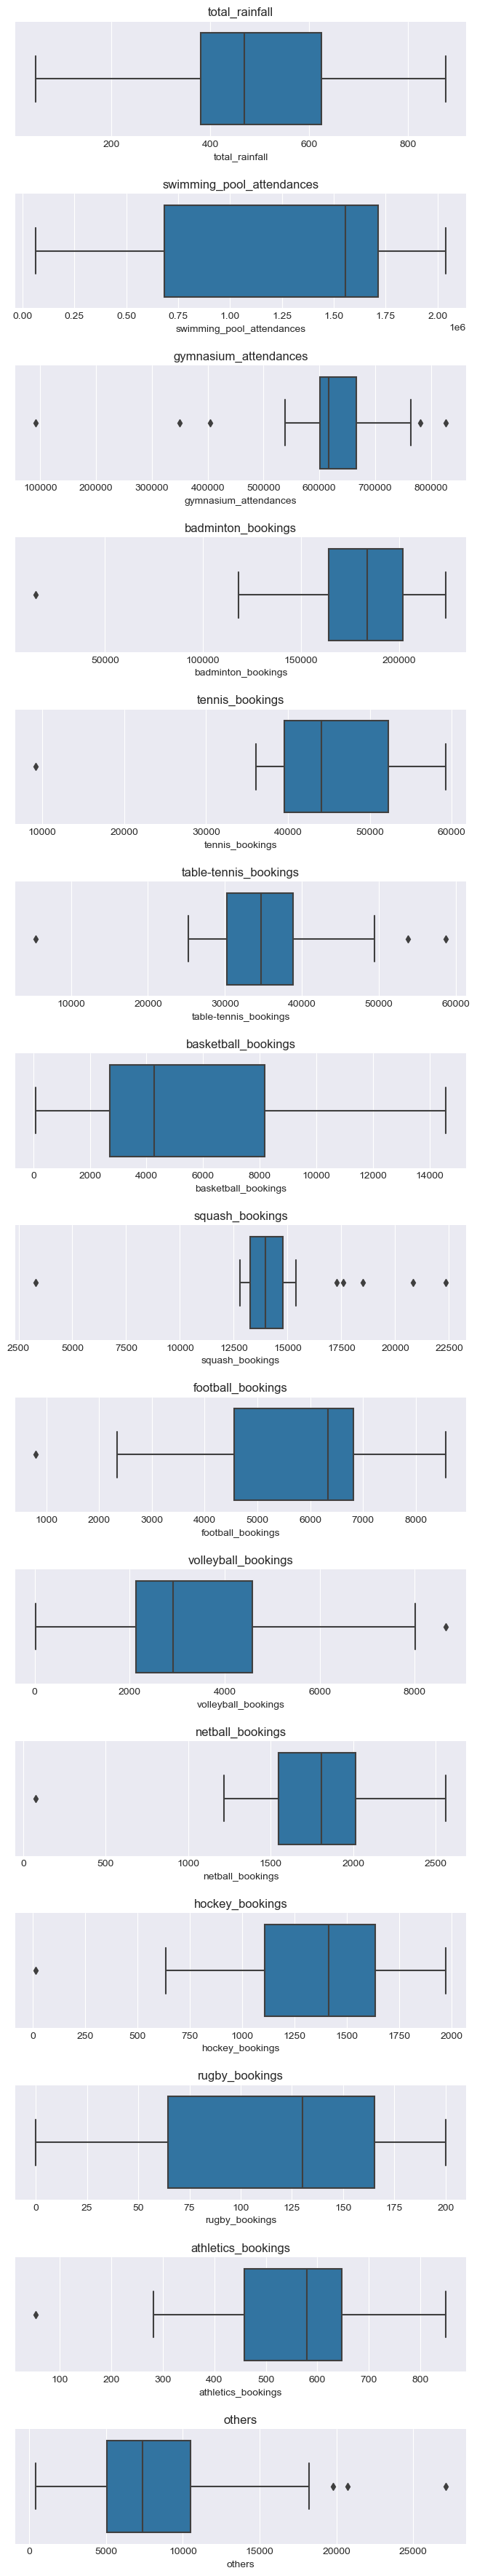

In [141]:
# - Are there any outliers months in the dataset?
excluded_columns = ['quarter', 'total_bookings', 'indoor_bookings', 'outdoor_bookings']
plots_data = rain_facil_data.drop(excluded_columns, axis = 1)

#plt.figure(figsize=(8, 12))
plt.figure(figsize=(8, len(plots_data.columns) * 3))

for i, col in enumerate(plots_data.columns, 1):
    plt.subplot(len(plots_data.columns), 1, i)
    sns.boxplot(x=plots_data[col])
    plt.title(col)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [142]:
# Based on the above box plots, there are some outliers for the various facilties bookings / attendances.
# However, there are less outliers when narrowing the data set to date range 2016-2019

**Are there any outliers months in the dataset?**

Based on the above box plots, there are some outliers for the various facilties bookings / attendances.
However, there are less outliers when narrowing the data set to date range 2016-2019

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


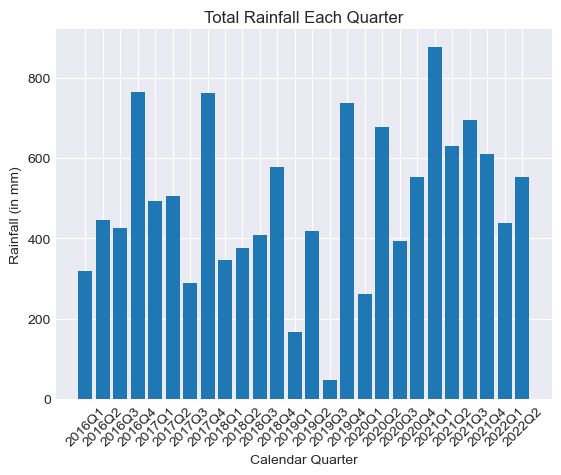

In [143]:
# Code

bars = rain_facil_data['quarter']
y_pos = np.arange(len(bars))
plt.bar(y_pos,rain_facil_data['total_rainfall'])
plt.xticks(y_pos, bars)
plt.xticks(rotation=45)

plt.title("Total Rainfall Each Quarter")
plt.xlabel("Calendar Quarter")
plt.ylabel("Rainfall (in mm)")

plt.show()


The above are the total rainfall for each quarter, matching against the calendar quarters available in the facilities data set. From the graph, 2019 stands out as having the quarter with the lowest rainfall.

C:\Users\user\AppData\Local\Temp\ipykernel_14784\3903710219.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


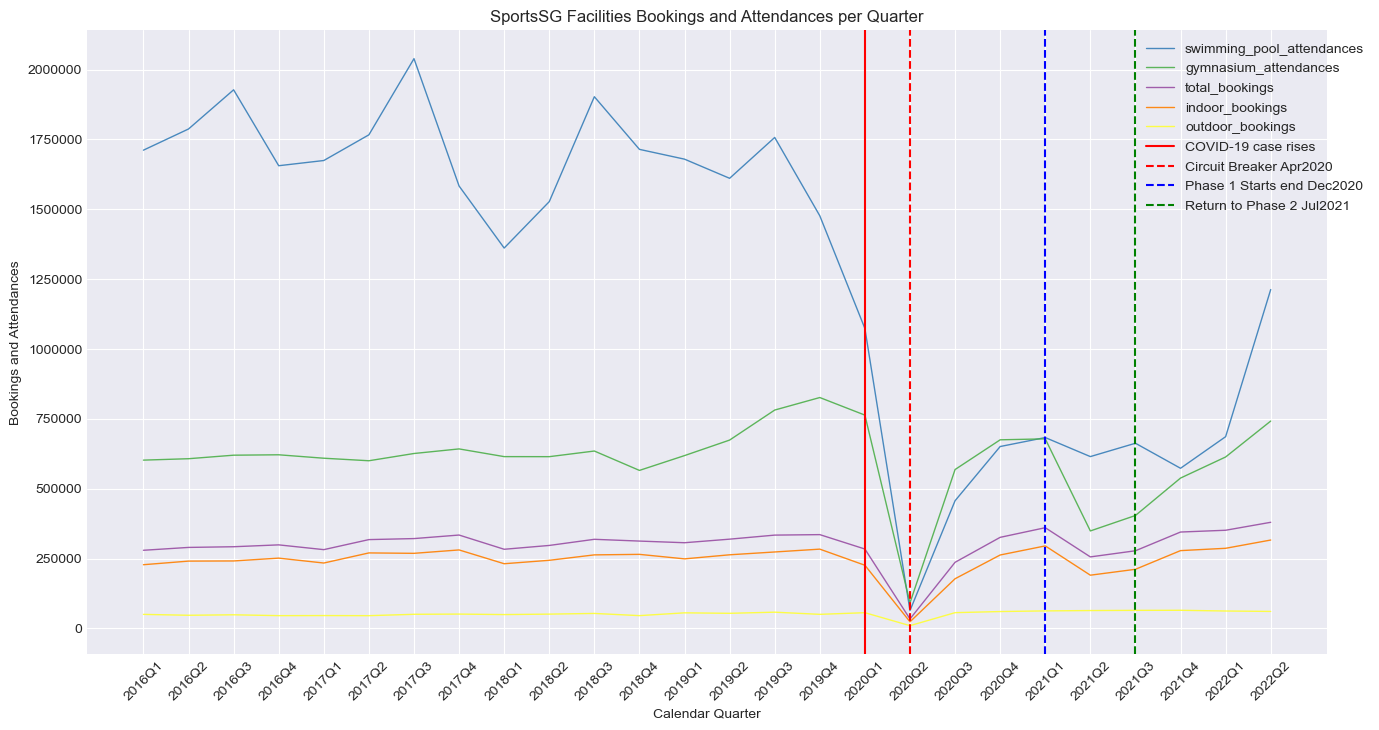

In [144]:
plt.figure(figsize = (16, 9))

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

to_plot = ['swimming_pool_attendances', 'gymnasium_attendances', 'total_bookings', 'indoor_bookings', 'outdoor_bookings']
num = 0
for p in to_plot:
    num += 1
    plt.plot(rain_facil_data['quarter'], rain_facil_data[p], marker='', color=palette(num), linewidth=1, alpha=0.9, label=p)

plt.axvline(x = '2020Q1', color='red', label= "COVID-19 case rises")
plt.axvline(x = '2020Q2', color='red', label= "Circuit Breaker Apr2020", linestyle='--')
plt.axvline(x = '2021Q1', color='blue', label= "Phase 1 Starts end Dec2020", linestyle='--')
plt.axvline(x = '2021Q3', color='green', label= "Return to Phase 2 Jul2021", linestyle='--')



plt.title("SportsSG Facilities Bookings and Attendances per Quarter")
plt.xlabel("Calendar Quarter")
plt.ylabel("Bookings and Attendances")

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

ax = plt.gca()
box = ax.get_position() 
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])


plt.legend(bbox_to_anchor=(1.04, 1),
          fancybox=True, ncol=1)

plt.xticks(rotation=45)

plt.show()

From this graph, we visualise what time periods the outlier data lies. It is evident from this graph that since the COVID-19 pandemic occurred, there has been much higher variances in the booking and attendances of sports facilities.

It is likely that there are other factors that now have a stronger relationship with the booking and attendances. Hence, we have decided to only study on the period from 2016 - 2019 prioor to COVID-19 so that we can focus on the relationship between total rainfall and booking and attendances of sports facilities.

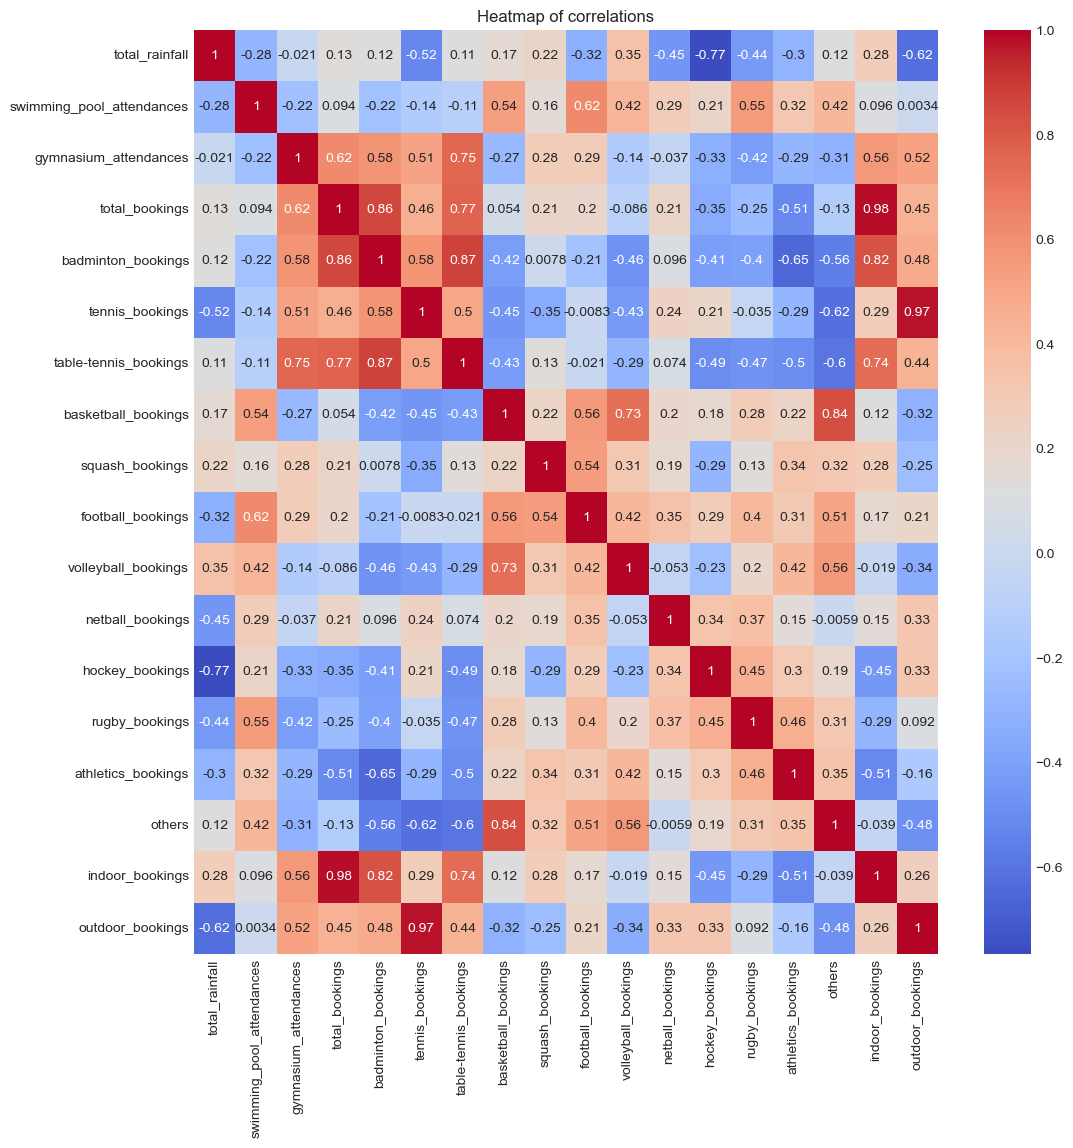

In [145]:
plt.figure(figsize=(12,12))
sns.heatmap(rain_facil_data[rain_facil_data['quarter'] < '2020Q1'].corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.title("Heatmap of correlations")

plt.show()

This heatmap shows the correlations of the various categories of bookings and attendances with total rainfall. It is clear that there are some negative correlation between total rainfall and the booking of outdoor facilities.

In [146]:
# Add a quarter datetime column for graphing purposes
rain_facil_data["quarter_dt"] = pd.to_datetime(rain_facil_data["quarter"])
rain_facil_data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14784\1363743545.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rain_facil_data["quarter_dt"] = pd.to_datetime(rain_facil_data["quarter"])


,quarter,total_rainfall,swimming_pool_attendances,gymnasium_attendances,total_bookings,badminton_bookings,tennis_bookings,table-tennis_bookings,basketball_bookings,squash_bookings,football_bookings,volleyball_bookings,netball_bookings,hockey_bookings,rugby_bookings,athletics_bookings,others,indoor_bookings,outdoor_bookings,quarter_dt
0,2016Q1,318.8,1711391,602359,279807,158672,41174,25269,8385,12781,6725,5722,1215,1793,151,599,17321,228150,50442,2016-01-01
1,2016Q2,446.4,1787179,607406,290013,163868,38183,26228,8631,13950,6708,7636,1705,1354,193,827,20730,241043,47265,2016-04-01
2,2016Q3,426.7,1927343,620011,292475,167820,39253,31542,9436,13979,7193,8648,1920,1471,193,849,10171,241596,48959,2016-07-01
3,2016Q4,763.8,1655738,621459,299133,178857,37321,33198,7526,13994,6507,7534,1540,1315,101,664,10576,251685,45908,2016-10-01
4,2017Q1,492.2,1674357,609166,282079,161171,37027,27901,9260,13283,6641,4328,1680,1715,174,660,18239,234182,46217,2017-01-01


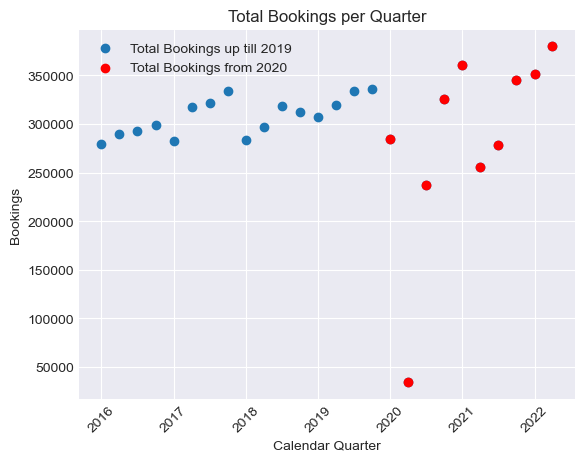

In [147]:
plt.scatter(x=rain_facil_data["quarter_dt"], y=rain_facil_data["total_bookings"], label='Total Bookings up till 2019')
data_after_2019 = rain_facil_data[rain_facil_data["quarter"] >= "2020Q1"]
plt.scatter(x=data_after_2019["quarter_dt"], y=data_after_2019["total_bookings"], c='red', label='Total Bookings from 2020')
plt.xticks(rotation=45)

plt.legend(loc='upper left')

plt.title("Total Bookings per Quarter")
plt.xlabel("Calendar Quarter")
plt.ylabel("Bookings")

plt.show()

This graph visualises how the data from 2020 onwards appear to trend differently compared to the data before 2020 (pre-COVID). The data up till 2019 appears to follow a more seasonal pattern, whereas data points from 2020 onwards are more scattered with no clear pattern.

In [148]:
data_till_2019 = rain_facil_data[rain_facil_data['quarter'] < '2020Q1']
data_till_2019.tail()

,quarter,total_rainfall,swimming_pool_attendances,gymnasium_attendances,total_bookings,badminton_bookings,tennis_bookings,table-tennis_bookings,basketball_bookings,squash_bookings,football_bookings,volleyball_bookings,netball_bookings,hockey_bookings,rugby_bookings,athletics_bookings,others,indoor_bookings,outdoor_bookings,quarter_dt
11,2018Q4,576.6,1714261,565570,312712,205199,39067,35441,3903,12903,5051,2861,1559,1280,131,446,4871,265178,45975,2018-10-01
12,2019Q1,167.4,1679219,618571,306806,192474,47306,31688,4290,12910,5888,2633,1780,1844,144,793,5056,249051,55975,2019-01-01
13,2019Q2,417.6,1610713,674119,319574,202155,45076,34479,4481,13984,6814,3436,1693,1581,200,583,5092,263627,54254,2019-04-01
14,2019Q3,46.8,1756879,781530,334074,204111,48341,39222,5323,13612,7587,3929,2052,1638,154,581,7524,273721,58301,2019-07-01
15,2019Q4,735.7,1476566,826317,335791,216517,42612,40697,3789,13964,6351,3491,1364,1081,55,463,5407,283865,50562,2019-10-01


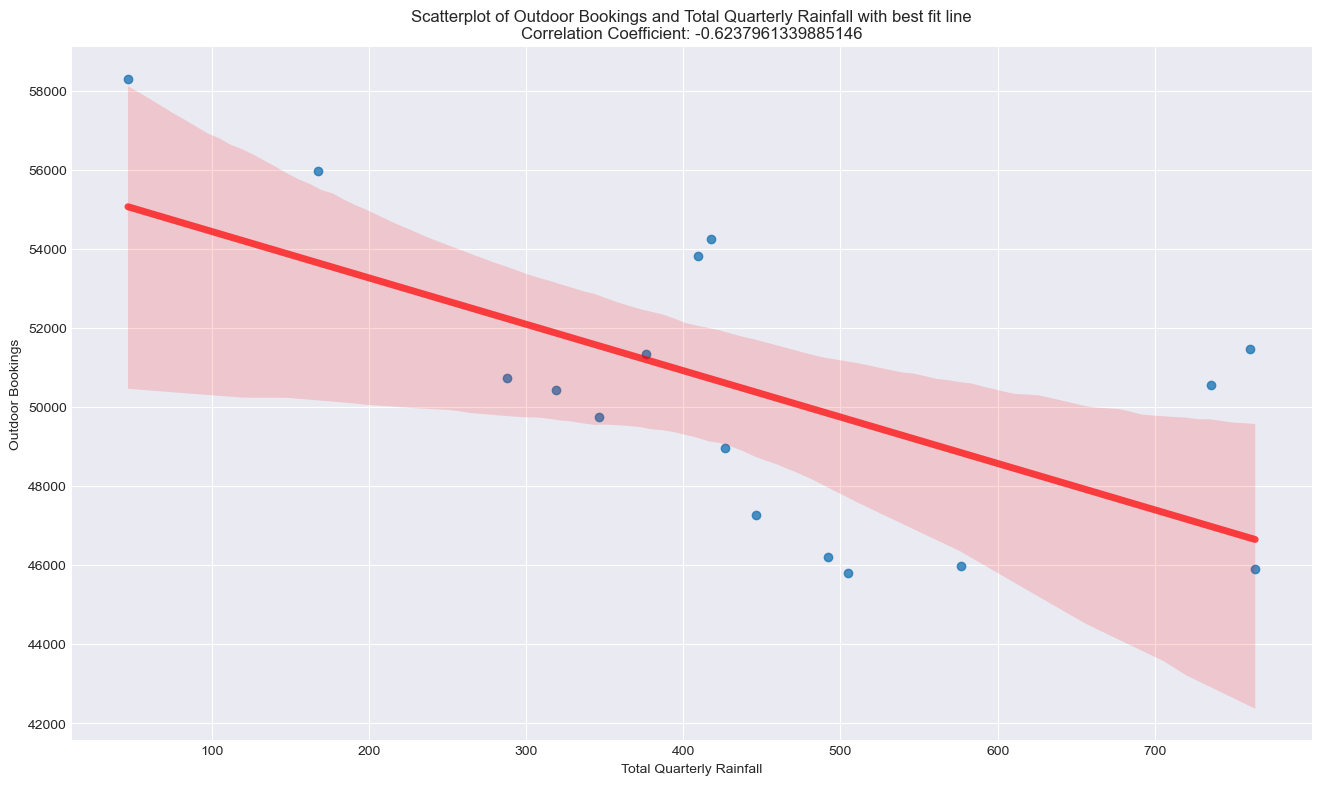

In [149]:
plt.figure(figsize = (16, 9))

sns.regplot(x=data_till_2019["total_rainfall"], y=data_till_2019["outdoor_bookings"], line_kws={"color":"r","alpha":0.7,"lw":5})

plt.title(f"Scatterplot of Outdoor Bookings and Total Quarterly Rainfall with best fit line\nCorrelation Coefficient: {data_till_2019['total_rainfall'].corr(data_till_2019['outdoor_bookings'])}")
plt.xlabel("Total Quarterly Rainfall")
plt.ylabel("Outdoor Bookings")

plt.show()

This graph shows the the negative correlation ship of total rainfall with bookings of outdoor sports facilities. Hence, higher total rainfall could indicate less bookings of outdoor sports facilities. The -0.62 correlation coefficient and the data points appearing more equally around the best fit line suggest that this relationship is moderate.

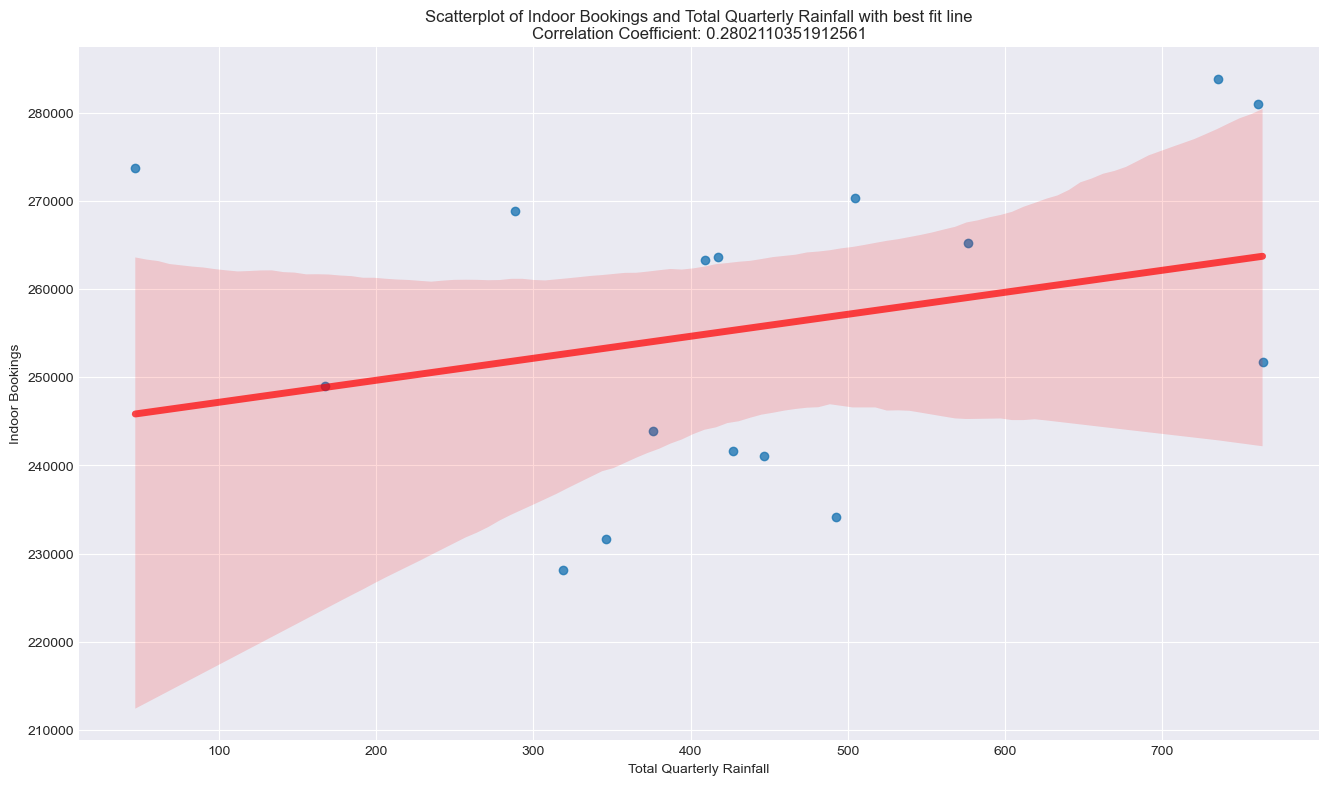

In [150]:
plt.figure(figsize = (16, 9))
sns.regplot(x=data_till_2019["total_rainfall"], y=data_till_2019["indoor_bookings"], line_kws={"color":"r","alpha":0.7,"lw":5})

plt.title(f"Scatterplot of Indoor Bookings and Total Quarterly Rainfall with best fit line\nCorrelation Coefficient: {data_till_2019['total_rainfall'].corr(data_till_2019['indoor_bookings'])}")
plt.xlabel("Total Quarterly Rainfall")
plt.ylabel("Indoor Bookings")

plt.show()

This graph suggests that there is a weaker positive relationship between total rainfall and booking of indoor sports facilities. It may be worth exploring to see if there is mobility of the bookings where during higher total rainfall, people may move to booking indoor facilities instead.

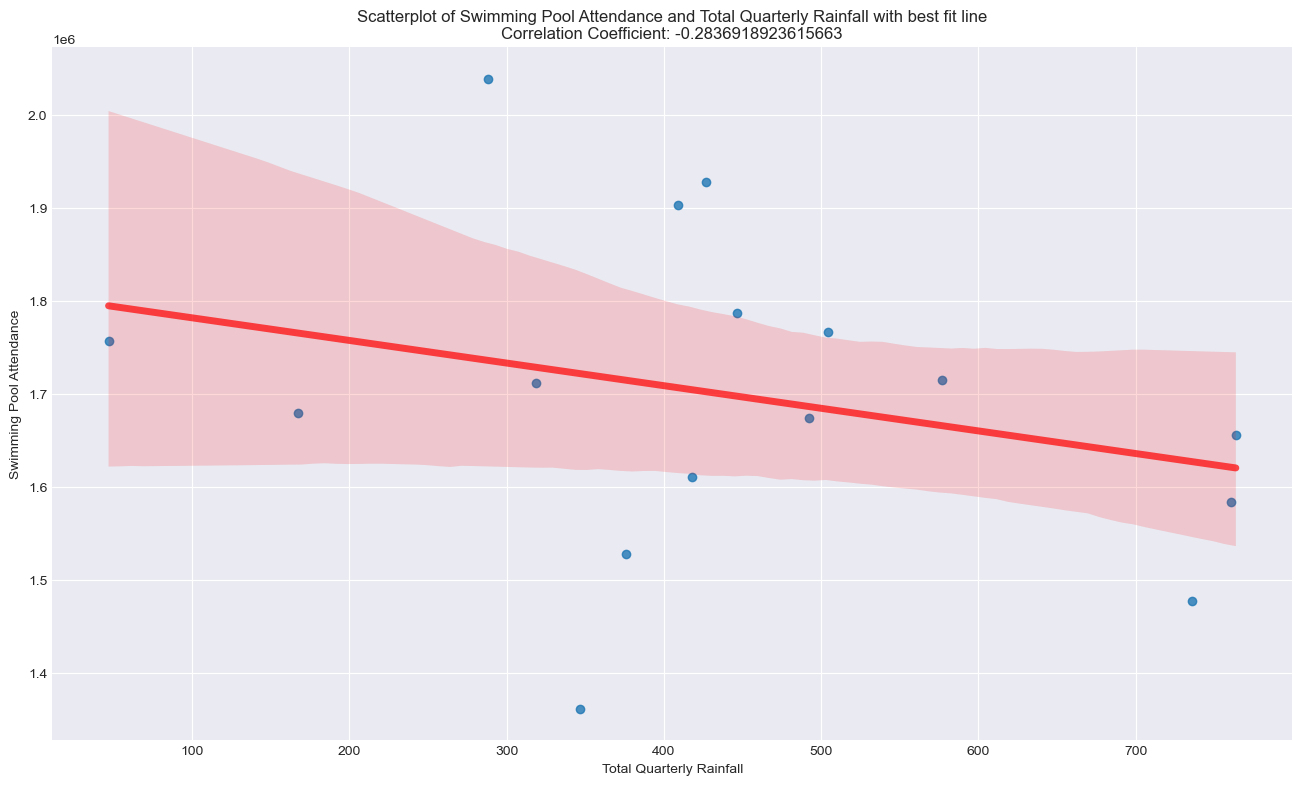

In [151]:
plt.figure(figsize = (16, 9))
sns.regplot(x=data_till_2019["total_rainfall"], y=data_till_2019["swimming_pool_attendances"], line_kws={"color":"r","alpha":0.7,"lw":5})

plt.title(f"Scatterplot of Swimming Pool Attendance and Total Quarterly Rainfall with best fit line\nCorrelation Coefficient: {data_till_2019['total_rainfall'].corr(data_till_2019['swimming_pool_attendances'])}")
plt.xlabel("Total Quarterly Rainfall")
plt.ylabel("Swimming Pool Attendance")

plt.show()

Swimming pool attendances similarly have a negative, though weaker, relationship with total rainfall compared to outdoor facilities booking.

This could be due to the differences in data collection as attendances are more flexible and do not require prior booking, and hence people are more able to commit to the activity and usage of facilities with less consideration for the weather and rainfall.

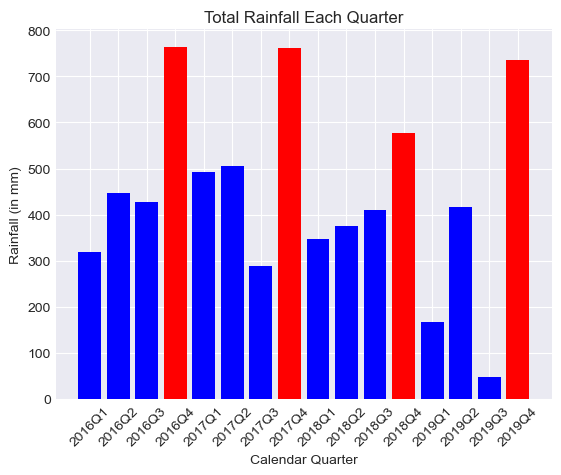

In [152]:

# Assuming 'quarter' and 'total_rainfall' are columns in the DataFrame
bars = rain_facil_data[rain_facil_data['quarter'] < '2020Q1']['quarter']
y_pos = np.arange(len(bars))

# Specify the color for each bar, making Q4 bars red
colors = ['red' if quarter.endswith('Q4') else 'blue' for quarter in rain_facil_data[rain_facil_data['quarter'] < '2020Q1']['quarter']]

plt.bar(y_pos, rain_facil_data[rain_facil_data['quarter'] < '2020Q1']['total_rainfall'], color=colors)
plt.xticks(y_pos, bars)
plt.xticks(rotation=45)

plt.title("Total Rainfall Each Quarter")
plt.xlabel("Calendar Quarter")
plt.ylabel("Rainfall (in mm)")

plt.show()

For the graph of the data period we have examined, the fourth quarter of every has noticeably larger total rainfall. These seasonal spikes could affect the correlation of rainfall with facilities usage and attenuate the results.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

From exploring the data, it suggests that there is meaningful negative correlation between using of outdoor sports facilities and total rainfall. When the total rainfall increases, the usage in the form of booking and attendances of sports facilities tend to decrease. 

To encourage people to be more physically active, we can consider rainfall to be a factor to take action against and reduce barriers to encourage continued usage of sports facilities.

SportsSG / ActiveSG may consider upgrading some of their outdoor sports facilities into sheltered or indoor versions where feasible. With a sheltered equivalent of the outdoor sports facilities, people may continue to be active in their preferred outdoor activity despite heavier rainfall which will be useful to continue building a more physically active nation.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!